In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import torchvision
from torch.utils.data import DataLoader
from torch.utils.tensorboard import SummaryWriter


In [ ]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [ ]:
vocab = {token : i for i, token in enumerate(classes)}

In [ ]:
vocab['plane']

0

In [ ]:
embeddings = nn.Embedding(num_embeddings=len(vocab),
                               embedding_dim=100,
                               padding_idx=1)
embeddings.weight[vocab['plane']]

tensor([-1.0734,  0.5133, -0.4517,  0.5881, -0.8415, -0.0935,  0.7483, -0.5629,
        -2.4380, -1.0753, -0.0419,  0.1076,  0.4861,  0.5372,  0.1953, -1.7633,
         0.1060,  0.0954, -0.7526, -2.2716, -0.4043,  0.6821,  0.1122,  0.1696,
        -1.6406, -0.7940,  1.3270, -0.3973,  0.7523, -0.3052, -1.0109,  0.5465,
        -0.7676,  0.1359,  0.6130, -0.9589,  1.6282,  2.3084,  1.7374,  0.5461,
        -0.3765,  0.2708,  0.1163,  1.2275, -1.5692, -0.4933, -0.7265,  0.3483,
         0.6115, -1.7244,  0.7134, -0.0529, -0.1406,  0.2402, -1.1725, -1.0420,
         0.5236, -0.8554,  0.0701, -0.7789,  0.3120,  0.5954, -0.2068, -1.2187,
         1.2731, -0.8906,  2.6085, -0.6826,  1.9298, -0.9838,  0.1132,  2.1583,
        -0.2278,  0.8803,  0.2314, -1.3636,  0.8352, -1.6314, -0.1012,  0.9415,
         0.5466, -2.4939, -0.6337, -0.5365, -0.3852,  0.3758, -0.0079,  1.5447,
        -1.0865,  1.2421,  0.3154,  0.9170,  1.9984,  0.9975,  1.6064, -2.0254,
        -1.2586, -0.5746,  0.0951,  0.54

In [ ]:
embeddings.weight[6]

tensor([-1.5414, -0.6428,  1.3731,  0.6179,  1.0025,  2.4893,  0.5452,  1.3181,
         0.8055, -0.4949, -1.2283, -0.0635,  0.0440,  0.3732,  0.7087, -1.2715,
         0.5891, -0.8190, -0.7149,  1.1589,  0.0898,  1.4648,  1.5880, -2.2797,
        -2.1166,  0.6040, -0.2013, -0.3680,  1.1748, -0.3250, -0.9784,  0.3442,
         2.0386, -0.8861,  1.1187, -0.4115, -0.7072, -1.3103, -0.7540,  0.2769,
        -0.8163, -0.3642, -0.7399, -0.2348,  1.3518,  0.9214,  0.3316,  1.4330,
         0.7606, -1.3257,  0.6359, -0.0617,  0.3488, -0.5065,  0.1406, -0.5146,
        -0.0215,  1.0663,  2.2238, -0.1399,  1.3460,  1.5573, -0.2280, -2.3574,
         0.7921,  0.7998,  0.1028, -0.4847, -1.1094, -0.4421,  0.4147,  0.1012,
         0.6391,  2.3570,  0.3427, -1.9669, -0.5220, -0.0996,  1.0179, -1.6325,
         1.1023,  0.0575, -0.1436,  2.0565, -2.2330, -2.0042,  0.6820,  1.6205,
        -0.6543, -0.1607, -0.5222, -1.3216, -0.7774,  1.4304,  2.8274,  0.9837,
        -1.4101, -0.4940,  2.3846,  0.98

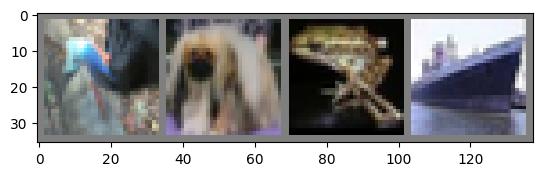

bird  dog   frog  ship 


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 이미지를 보여주기 위한 함수

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# 학습용 이미지를 무작위로 가져오기
dataiter = iter(trainloader)
images, labels = next(dataiter)

# 이미지 보여주기
imshow(torchvision.utils.make_grid(images))
# 정답(label) 출력
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
d_noise = 100
d_hidden_1 = 256
d_hidden_2 = 512
image_dim = 32*32
batch_size = 64

class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.generator = nn.Sequential(
            nn.ConvTranspose2d(d_noise, 256, kernel_size=8, stride=1, padding=0),
            nn.ReLU(),
            nn.ConvTranspose2d(256, 128, kernel_size=4, stride=2, padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(128, 1, kernel_size=4, stride=2, padding=1),
            nn.Tanh()
        )

    def forward(self, x):
        x = x.view(x.size(0), d_noise, 1, 1)  # 입력 잡음 벡터를 (batch_size, d_noise, 1, 1) 형태로 변환
        x = self.generator(x)
        return x

    def forward(self, x):
        x = self.generator(x)
        return x

In [ ]:
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()

        self.discriminator = nn.Sequential(
            nn.Linear(32*32, d_hidden_1),
            nn.LeakyReLU(),
            nn.Dropout(0.1),
            nn.Linear(d_hidden_1, d_hidden_2),
            nn.LeakyReLU(),
            nn.Dropout(0.1),
            nn.Linear(d_hidden_2, 10),
            nn.Sigmoid()
        ).to(device)

    def forward(self, x):
        x = self.discriminator(x)
        return x


In [ ]:
disc = Discriminator().to(device)
gen = Generator().to(device)

fixed_noise = torch.randn(batch_size, d_noise).view(batch_size, d_noise, 1, 1).to(device)

lr = 3e-4
num_epochs = 50

opt_disc = optim.Adam(disc.parameters(), lr=lr)
opt_gen = optim.Adam(gen.parameters(), lr=lr)
criterion = nn.BCELoss()

step = 0

In [ ]:
import numpy as np

# 예제 텐서 생성
tensor = np.random.rand(4, 100)

# 텐서에 새로운 차원을 추가하고 복사
# 텐서의 shape을 (4, 1, 100)으로 만든 다음, 이를 (4, 3, 100)으로 반복
expanded_tensor = np.expand_dims(tensor, axis=1)
reshaped_tensor = np.tile(expanded_tensor, (1, 3, 1))

print(reshaped_tensor.shape)  # 출력: (4, 3, 100)


(4, 3, 100)


In [ ]:
fake_list = []
real_list = []

for epoch in range(num_epochs):
    for batch_idx, (real, label) in enumerate(trainloader):
        real = real.view(-1, 1024).to(device)
        batch_size = real.shape[0]

        ### Train Discriminator: max log(D(x)) + log(1 - D(G(z)))
        #noise = torch.randn(batch_size, d_noise).to(device)
        embedding_label = embeddings(label).to(device)
        embedding_label = embedding_label.unsqueeze(1)
        embedding_label = embedding_label.repeat(1, 3, 1).view(batch_size, d_noise, 1, 1)

        #print(real.shape, label.shape, noise.shape, embedding_label.shape)
        #print(label)
        fake = gen(embedding_label)
        #print(disc_real.shape, real.shape, fake.shape)
        disc_fake = disc(fake.view(-1, 1024)).view(-1)
        disc_real = disc(real)

        #print(disc_real.shape, real.shape, disc_fake.shape)
        #lossD_real = criterion(disc_real, torch.ones_like(disc_real))
        disc_fake = disc(fake.view(-1, 1024)).view(-1)
        lossD = criterion(disc_fake.view(batch_size,-1), disc_real)
        #lossD = (lossD_real + lossD_fake) / 2
        disc.zero_grad()
        lossD.backward(retain_graph=True)
        opt_disc.step()

        ### Train Generator: min log(1 - D(G(z))) <-> max log(D(G(z))
        # where the second option of maximizing doesn't suffer from
        # saturating gradients
        output = disc(fake.view(-1, 1024)).view(-1)
        lossG = criterion(output, torch.ones_like(output))
        gen.zero_grad()
        lossG.backward()
        opt_gen.step()

        if batch_idx == 0:
            print(
                f"Epoch [{epoch}/{num_epochs}] Loss D: {lossD:.4f}, loss G: {lossG:.4f}"
            )

            with torch.no_grad():
                fake = gen(fixed_noise).reshape(-1, 1, 32, 32)
                data = real.reshape(-1, 1, 32, 32)

                fake_list.append(fake)
                real_list.append(data)
                step += 1

Epoch [0/50] Loss D: 0.5054, loss G: 0.9416


In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20, 4))

for images, row in zip([fake_list[-1], real_list[-1]], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.cpu().numpy().squeeze(), cmap='gray')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

plt.show()